# Object-oriented Programming

This notebook is intended to give you an introduction to Object-oriented Programming in Python. More details about this subject can be found in any programming textbook (e.g. Learning Python: Powerful Object-Oriented Programming by Mark Lutz, although you are not required to study anything more than what is in this notebook). 

The official python tutorial has a good section on how python handles Object-oriented Programming (https://docs.python.org/3/tutorial/classes.html) which we will summarize in this notebook.

**Object-oriented Programming** is a programming paradigm which provides means of structuring programs so that properties and behaviors are centered around so-called **objects**.

## Classes and objects

*   Classes – A packaged python type that contains the definitions of the data packaged, which we will call attributes, and available procedures, which we will call methods 
*   Objects – instances of classes

A class can be user-defined, imported from a library, or standard to the programming language.


``` python
class Car: # This is a class
  fuel_level = 0.
  speed = 0.
  def refuel(self):
    self.fuel_level = 1.
  def accelerate(self):
    self.speed += 0.1
  def decelerate(self):
    self.speed -= 0.1
  ...

my_car = Car() # This is an object 
my_car.refuel()
my_car.accelerate()
```

Here is a more practical example of objects and classes:

In [ ]:
import numpy as np

class ComplexNumber: # By convention, user-defined Python class names are camel cased
  
  def get_modulus(self): # Will explain self soon
    return np.sqrt(self.real_part**2 + self.imaginary_part**2)
  
  def to_str(self): # Will explain self soon
    sign = '+' if self.imaginary_part >= 0 else '-' # Notice the in-line if :)
    return str(self.real_part)+sign+str(np.abs(self.imaginary_part))+'i'


z = ComplexNumber() # This is how we instantiate, z is now an object of class 
# ComplexNumber
z.real_part = 1
z.imaginary_part = 2
print('z =',z.to_str())
print('Modulus of z is', z.get_modulus())

z = 1+2i
Modulus of z is 2.23606797749979


### The self argument 
`self` represents the instance of the class (the object). By using the `self` argument we can access the attributes and methods of the class in python. You need to put the `self` as an argument of every method defined inside the class, and use it as it was an instance of the class you are defining.

`self` refers to the "calling object," i.e. the instance that is calling the specific method.

Here is a more interesting example:

In [ ]:
class ComplexNumber: 

  imaginary_number = 'i' # attribute

  def to_str(self):
    sign = '+' if self.imaginary_part >= 0 else '-' 
    return str(self.real_part)+sign+str(np.abs(self.imaginary_part))+ self.imaginary_number

  def get_modulus(self):
    return np.sqrt(self.real_part**2 + self.imaginary_part**2)
  
  def get_conjugate(self):
    conj = ComplexNumber()
    conj.real_part = self.real_part
    conj.imaginary_part = - self.imaginary_part
    return conj

  def multiply(self, z):
    mult = ComplexNumber()
    mult.real_part = self.real_part*z.real_part - self.imaginary_part*z.imaginary_part
    mult.imaginary_part = self.real_part*z.imaginary_part + self.imaginary_part*z.real_part
    return mult

z = ComplexNumber()
z.real_part = 1
z.imaginary_part = 1
z_c = z.get_conjugate()
print('z =',z.to_str())
print('conjugate of z =',z_c.to_str())
print('z multiplied by conjugate of z =',z.multiply(z_c).to_str()) # Should be real and square of the modulus :)
z_c.imaginary_number = 'j' # Becoming an engineer
print('conjugate of z =',z_c.to_str())

z = 1+1i
conjugate of z = 1-1i
z multiplied by conjugate of z = 2+0i
conjugate of z = 1-1j


We defined 2 new methods `conjugate` and `multiply` which return an instance of `ComplexNumber` itself! Notice how we added an attribute of the complex number to define how we write the imaginary number (are you an engineer or a mathematician?). 

Attributes can be defined inside the class or outside the class by the user (`real_part` and `imaginary_part` are attributes). But these attributes are pretty important, all the class functioning rely on them ... 

### the `__init__` method

The `__init__` method is called a constructor, it is used to initialize the object’s attributes. The task of constructors is to initialize(assign values) to the attribute of the class when an object of class is created, this will happen as soon as an object of a class is instantiated. 

Here is an example:

In [ ]:
class ComplexNumber: 
  def __init__(self, real_part, imaginary_part):
    self.real_part = real_part
    self.imaginary_part = imaginary_part

z = ComplexNumber(real_part=1, imaginary_part=1) # expect an error

This way we force the user to provide essential attributes (real_part and imaginary_part) at the moment of the instantiation.

In [ ]:
class ComplexNumber: 
  def __init__(self, real_part, imaginary_part, imaginary_number='i'):
    self.real_part = real_part
    self.imaginary_part = imaginary_part
    self.imaginary_number = imaginary_number # We can move this inside the constructor (instance attribute)

  def to_str(self):
    sign = '+' if self.imaginary_part >= 0 else '-' 
    return str(self.real_part)+sign+str(np.abs(self.imaginary_part))+self.imaginary_number

z = ComplexNumber(1,1,'k')
z.imaginary_part = 3
print('z =',z.to_str())

z = 1+3k


### Other useful methods

More generally, a method with `__two_underscores__` points to a native python function, e.g. addition, multiplication, etc. These functions are defined in python for regular types (int, float, etc.) but maybe not for your custom class. Including some of these functions as you need will ease coding. However, you have to be extremely careful because you are overriding a native python function within that class.

In [ ]:
class ComplexNumber: 
  def __init__(self, real_part, imaginary_part):
    self.real_part = real_part
    self.imaginary_part = imaginary_part
    self.imaginary_number = 'i' # We can move this inside the constructor 

  def __eq__(self, other):
    return self.real_part == other.real_part and self.imaginary_part == other.imaginary_part

  def __str__(self):
    sign = '+' if self.imaginary_part >= 0 else '-' 
    return str(self.real_part)+sign+str(np.abs(self.imaginary_part))+self.imaginary_number

  def __add__(self, other):
    return ComplexNumber(self.real_part+other.real_part, self.imaginary_part+other.imaginary_part)

  # ...

z1 = ComplexNumber(1,1)
z2 = ComplexNumber(1,1.1)
print(z1 == z2)
print(z1)
print(z1+z2)

False
1+1i
2+2.1i


### Another example: `iterator` class

Python allows to build so-called iterators, they are defined around an iterable object (list, file, string, whatever has many elements,...). Each time we call the `next` method on the iterator gives us the next element. If there are no more elements, it raises a `StopIteration`.

```python
class Iterator:
    ...
    ...
    def __next__(self): # built-in next function
        if #still have data
            return #data
        else:
            raise StopIteration()
```

In [ ]:
l = [1, 2, 3]
iter_l = iter(l) # python built-in list iterator
for _ in range(10):
  print(next(iter_l))

1
2
3


StopIteration: ignored

## Inheritance

Inheritance is the most important aspect of Object-oriented Programming. It is a mechanism where you can derive a class from another class that shares attributes and methods. Using inheritance will allow you to do more code-sharing, which is always desirable. 

Here is a simple example of how to subclass the list class (shown just for illustrative reasons, this is not a good programming practice)

In [ ]:
x = [1, 2 ,3]
y = [1, 2, 3]
[x[i] == y[i] for i in range(len(x))]
#x==y

[True, True, True]

In [ ]:
class ListCustom(list):
  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs) 
        
  def __eq__(self, other):
    return (np.array(self) == np.array(other)).tolist()

In [ ]:
x = ListCustom([[1,2,3],[1,2,3]])
y = ListCustom([[1,2,3],[1,2,3]])
x==y

[[True, True, True], [True, True, True]]

In [ ]:
# checking * operator
L = [1,2,3,4,'a'] 
print(L)
print(1,2,3,4,'a',1,2,3,1,1)

[1, 2, 3, 4, 'a']
1 2 3 4 a 1 2 3 1 1


In [ ]:
# checking ** operator
kwargs = {'dtype': np.float32, 'copy': True}
np.array([1,2,3,3], **kwargs)

array([1., 2., 3., 3.], dtype=float32)

In [ ]:
# Practical use: pass a variable number of arguments to a function
def myFun(*args, **kwargs): 
    print("args: ", args) 
    print("kwargs: ", kwargs) 

myFun('argument1','argment2',first="kw_argument1",mid="kw_argument2",last="kw_argument3")

args:  ('argument1', 'argment2')
kwargs:  {'first': 'kw_argument1', 'mid': 'kw_argument2', 'last': 'kw_argument3'}


A more realistic problem (Bonus)

In [ ]:
from scipy.stats import rv_continuous
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

class truncated_norm(rv_continuous): # The new class truncated_norm inherits attributes and methods of rv_continuous
    
    def __init__(self, loc, scale, *args, **kwargs): # *args and **kwargs explained later
      self.loc = loc # This is a new attribute
      self.scale = scale # This is a new attribute
      super(truncated_norm, self).__init__(*args, **kwargs) # Calling the constructor of rv_continuous, equivalent to super()
      self.Za = norm.cdf(self.a,loc=self.loc, scale=self.scale) # This is a new attribute
      self.Zb = norm.cdf(self.b,loc=self.loc, scale=self.scale) # This is a new attribute
    
    def _pdf(self, x): 
      x = np.array(x)
      mask = ((x >= self.a) & (x <= self.b))
      p = np.zeros(np.shape(x))
      p[mask] = norm.pdf(x[mask],loc=self.loc, scale=self.scale)/(self.Zb-self.Za) 
      return p

    def _rvs(self, **kwargs):
      size = self._size[0]
      r = norm.rvs(size=int(10*(1+(1-self.Zb) + self.Za))*size, loc=self.loc, scale=self.scale) # Little hack to make sure we have enough in range data
      mask = ((r >= self.a) & (r <= self.b))
      return r[mask][:size]

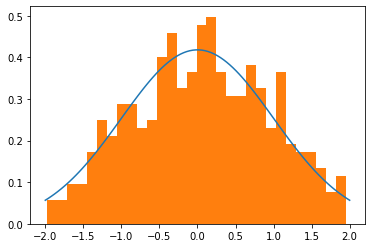

In [ ]:
r = truncated_norm(loc=0, scale=1, a=-2, b=2)
real = r.rvs(size=400)
x = np.linspace(r.a,r.b,100)
plt.plot(x,r.pdf(x))
plt.hist(real,bins=30,density=True)
plt.show()

## How are we going to use this?

Object-oriented Programming can be used in any field, it tends to make the code easier to read, less verbose, and easier to maintain. In our case, when needed we will use Object-oriented Programming to deal with prediction **models** (you will hear about those too). For example: here is the definition of a model:


```python
def CustomModel(base_model):
  def __init__(self,...):
    # Adding attributes
  def _architecture(self,...):
    # Define the architecture of the model
  def _preprocess(self,data,...):
    # Define preprocessing
    return preprocessed_data
  def _forward_pass(self,...):
    # Define the behavior of the model
  ...
  def train(self, ...):
    # Define how the model is trained
  def predict(self, data,...):
    # Define how the model predicts
    return prediction
```

Note that we will not always use this paradigm, but notice that most ML/DL libraries are Object-oriented, this will at least help you understand this code for example: https://github.com/scikit-learn/scikit-learn/blob/95d4f0841/sklearn/linear_model/_logistic.py#L1191